# NAME: CHINMAYI BENGALURU PRAKASH
USC ID: 7142609162


# EDA

In [192]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
%matplotlib inline
start_time = timer()
import time

In [193]:
data = pd.read_csv('applications data.csv')

In [194]:
data.shape

(1000000, 10)

In [195]:
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
5,6,20160101,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
6,7,20160101,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
7,8,20160101,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
8,9,20160101,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0
9,10,20160101,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,19750127,3749451123,0


In [196]:
data.dtypes

record          int64
date            int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [197]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])

In [198]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob                     int64
homephone               int64
fraud_label             int64
dtype: object

In [199]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [200]:
data.tail(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0
999999,1000000,2016-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,19820826,5869926905,0


In [201]:
data.describe()

,record,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,500000.500000,5.083415e+08,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278932,2.934864e+08,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,3.600000e+01,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,74496.000000,1.983032e+07,8.109241e+09,0.000000
max,1000000.000000,1.000000e+09,99999.000000,2.016103e+07,1.000000e+10,1.000000


In [202]:
data.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dtype: int64

In [203]:
data['fraud_label'].sum()

14393

In [204]:
print(len(data[data['fraud_label'] == 0]))

985607


In [205]:
print(len(data[data['fraud_label'] == 0]) + len(data[data['fraud_label'] != 0]))

1000000


In [206]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [207]:
numrecords = len(data)
print(numrecords)

1000000


In [208]:
print(len(goods))

985607


In [209]:
print(len(bads))

14393


In [210]:
len(data['record'].unique())

1000000

In [211]:
len(data['record']) * 100 / numrecords

100.0

In [212]:
len(data['date']) * 100 / numrecords

100.0

In [213]:
len(data['date'].unique())

365

In [214]:
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2016-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840
2016-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719
2016-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764
2016-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757
2016-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732
2016-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682
2016-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782
2016-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809
2016-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779


<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

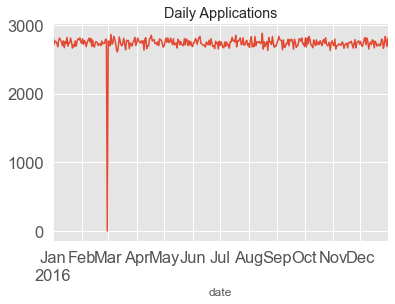

In [215]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().apps
daily_count.plot(title = 'Daily Applications')

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

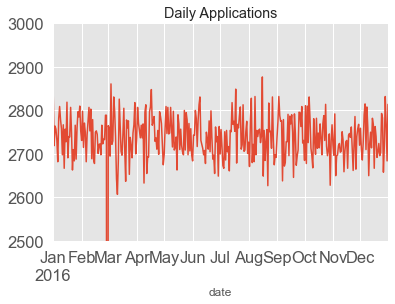

In [216]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().apps
plt.ylim(2500,3000)
daily_count.plot(title = 'Daily Applications')

In [217]:
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
2016-01-06    2682
2016-01-07    2782
2016-01-08    2809
2016-01-09    2779
2016-01-10    2758
2016-01-11    2698
2016-01-12    2767
2016-01-13    2667
2016-01-14    2757
2016-01-15    2728
2016-01-16    2819
2016-01-17    2691
2016-01-18    2740
2016-01-19    2739
2016-01-20    2807
2016-01-21    2748
2016-01-22    2663
2016-01-23    2710
2016-01-24    2684
2016-01-25    2766
2016-01-26    2688
2016-01-27    2760
2016-01-28    2797
2016-01-29    2785
2016-01-30    2810
2016-01-31    2753
2016-02-01    2731
2016-02-02    2798
2016-02-03    2715
2016-02-04    2771
2016-02-05    2750
2016-02-06    2682
2016-02-07    2745
2016-02-08    2778
2016-02-09    2807
2016-02-10    2753
2016-02-11    2803
2016-02-12    2689
2016-02-13    2779
2016-02-14    2687
2016-02-15    2678
2016-02-16    2750
2016-02-17    2753
2016-02-18    2745
2016-02-19    2701
2016-02-20    2722
2016-02-21    2723
2016-02

In [218]:
daily_count['2016-02-29'] = daily_count['2016-02-28']
daily_count.head(70)

date
2016-01-01    2840
2016-01-02    2719
2016-01-03    2764
2016-01-04    2757
2016-01-05    2732
2016-01-06    2682
2016-01-07    2782
2016-01-08    2809
2016-01-09    2779
2016-01-10    2758
2016-01-11    2698
2016-01-12    2767
2016-01-13    2667
2016-01-14    2757
2016-01-15    2728
2016-01-16    2819
2016-01-17    2691
2016-01-18    2740
2016-01-19    2739
2016-01-20    2807
2016-01-21    2748
2016-01-22    2663
2016-01-23    2710
2016-01-24    2684
2016-01-25    2766
2016-01-26    2688
2016-01-27    2760
2016-01-28    2797
2016-01-29    2785
2016-01-30    2810
2016-01-31    2753
2016-02-01    2731
2016-02-02    2798
2016-02-03    2715
2016-02-04    2771
2016-02-05    2750
2016-02-06    2682
2016-02-07    2745
2016-02-08    2778
2016-02-09    2807
2016-02-10    2753
2016-02-11    2803
2016-02-12    2689
2016-02-13    2779
2016-02-14    2687
2016-02-15    2678
2016-02-16    2750
2016-02-17    2753
2016-02-18    2745
2016-02-19    2701
2016-02-20    2722
2016-02-21    2723
2016-02

<AxesSubplot:title={'center':'Daily Applications'}, xlabel='date'>

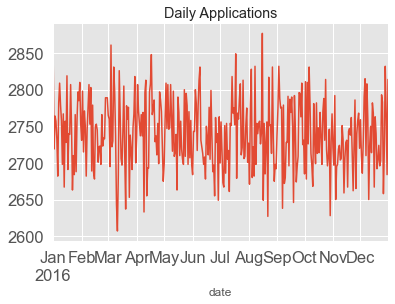

In [219]:
daily_count.plot(title = 'Daily Applications')

<AxesSubplot:title={'center':'Daily Applicationss'}, xlabel='date'>

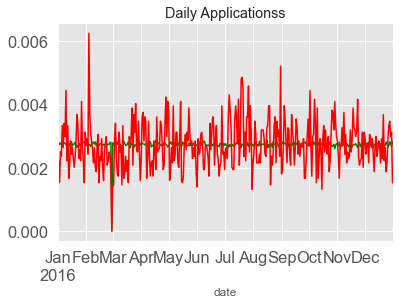

In [220]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

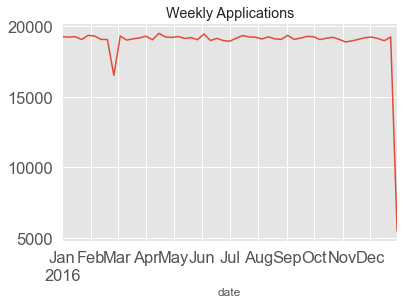

In [221]:
weekly_applications = data.assign(apps = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().apps
weekly_applications.plot(title = 'Weekly Applications')

In [222]:
weekly_applications.head(60)

date
2016-01-01    19276
2016-01-08    19235
2016-01-15    19272
2016-01-22    19068
2016-01-29    19363
2016-02-05    19318
2016-02-12    19081
2016-02-19    19067
2016-02-26    16531
2016-03-04    19323
2016-03-11    19029
2016-03-18    19118
2016-03-25    19181
2016-04-01    19306
2016-04-08    19052
2016-04-15    19508
2016-04-22    19254
2016-04-29    19217
2016-05-06    19284
2016-05-13    19143
2016-05-20    19204
2016-05-27    19057
2016-06-03    19463
2016-06-10    19000
2016-06-17    19151
2016-06-24    18994
2016-07-01    18950
2016-07-08    19160
2016-07-15    19351
2016-07-22    19255
2016-07-29    19233
2016-08-05    19108
2016-08-12    19258
2016-08-19    19116
2016-08-26    19080
2016-09-02    19362
2016-09-09    19082
2016-09-16    19169
2016-09-23    19292
2016-09-30    19272
2016-10-07    19067
2016-10-14    19160
2016-10-21    19227
2016-10-28    19080
2016-11-04    18896
2016-11-11    18975
2016-11-18    19084
2016-11-25    19196
2016-12-02    19247
2016-12-09    1

<AxesSubplot:title={'center':'Weekly Applications'}, xlabel='date'>

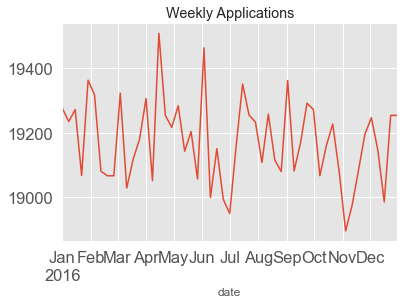

In [223]:
weekly_applications['2016-02-26'] = weekly_applications['2016-02-19']
weekly_applications['2016-12-30'] = weekly_applications['2016-12-23']
weekly_applications.plot(title = 'Weekly Applications')

<AxesSubplot:title={'center':'Weeky Applications'}, xlabel='date'>

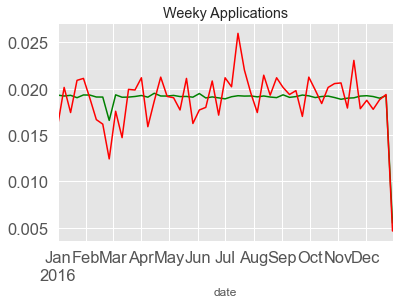

In [224]:
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [225]:
len(data['ssn']) * 100 / numrecords

100.0

In [226]:
len(data['ssn'].unique())

835819

In [227]:
data['ssn'].value_counts()

999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
705106256        1
457646422        1
419899735        1
500860762        1
803217404        1
Name: ssn, Length: 835819, dtype: int64

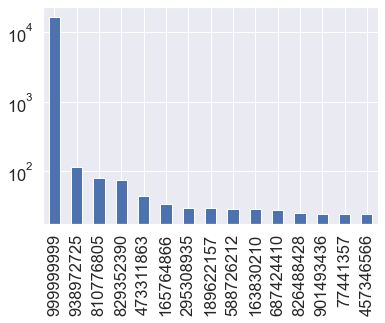

In [228]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [229]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
10,11,2016-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,19400126,3026547212,0
22,23,2016-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,19580830,5568704443,0
64,65,2016-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
68,69,2016-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,20110831,5490098836,0
74,75,2016-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,19760625,2382673773,0
283,284,2016-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,19070626,153492955,0
380,381,2016-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,19070626,3181686949,0
420,421,2016-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,19970721,316681200,0
446,447,2016-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,19110729,5350782211,0
468,469,2016-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,19700418,2503172355,0


In [230]:
len(data['firstname']) * 100 / numrecords

100.0

In [231]:
len(data['firstname'].unique())

78136

In [232]:
data['firstname'].value_counts()

EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
SEMUJXEZZ        1
SMZAMMSAU        1
RMXSJUEXS        1
UJJJATZMM        1
MSSXSRXAJ        1
Name: firstname, Length: 78136, dtype: int64

<AxesSubplot:>

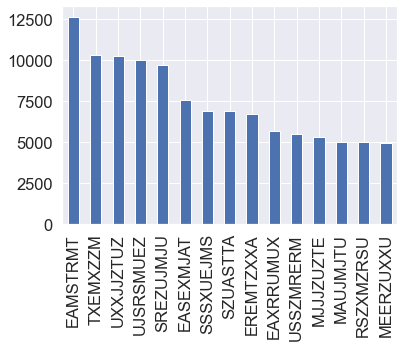

In [233]:
data['firstname'].value_counts().head(15).plot(kind='bar')

In [234]:
len(data['lastname']) * 100 / numrecords

100.0

In [235]:
len(data['lastname'].unique())

177001

In [236]:
data['lastname'].value_counts()

ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
UAMMAAZR       1
SRMTZXA        1
RXUARAZU       1
SMRRSTMS       1
SRRSEZSS       1
Name: lastname, Length: 177001, dtype: int64

<AxesSubplot:>

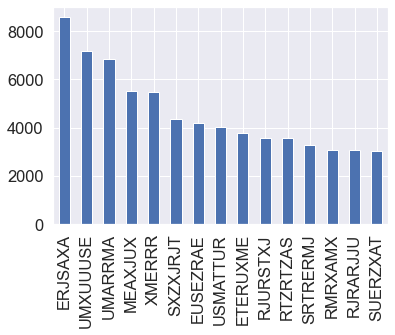

In [237]:
data['lastname'].value_counts().head(15).plot(kind='bar')

In [238]:
len(data['address']) * 100 / numrecords

100.0

In [239]:
len(data['address'].unique())

828774

In [240]:
data['address'].value_counts()

123 MAIN ST      1079
1775 XJXE LN       97
7433 RAEZA ST      80
8911 MZSU DR       74
4907 RRAAU DR      73
                 ... 
1350 UAUTM PL       1
1722 XXXUM ST       1
4923 XMUTT ST       1
2875 USEMA CT       1
3992 RXT LN         1
Name: address, Length: 828774, dtype: int64

<AxesSubplot:>

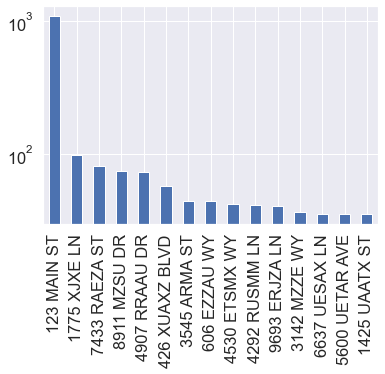

In [241]:
data['address'].value_counts().head(15).plot(kind='bar',logy=True)

In [242]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
1247,1248,2016-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,19241031,8135264540,0
2191,2192,2016-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,19300526,94097353,0
2529,2530,2016-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,19621101,7715547340,0
3434,3435,2016-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,19640428,8788942828,0
3750,3751,2016-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,19731107,974228226,0
4715,4716,2016-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,19810323,1839236819,1
5353,5354,2016-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,19980513,5441682419,0
7299,7300,2016-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,19340914,7507186577,0
8512,8513,2016-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,19190519,5922864904,0
8750,8751,2016-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,19821127,6442565981,0


In [243]:
len(data['zip5']) * 100 / numrecords

100.0

In [244]:
len(data['zip5'].unique())

26370

In [245]:
data['zip5'].value_counts()

68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
19358      1
54992      1
52110      1
33877      1
90739      1
Name: zip5, Length: 26370, dtype: int64

<AxesSubplot:>

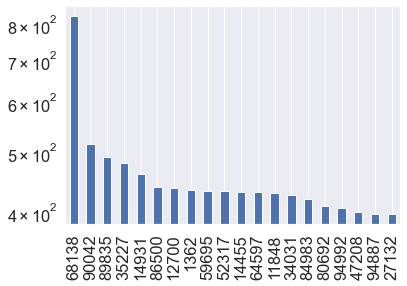

In [246]:
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

In [247]:
len(data['dob']) * 100 / numrecords

100.0

In [248]:
len(data['dob'].unique())

42673

In [249]:
data['dob'].value_counts()

19070626    126568
19640318      4818
19760625      3723
19880628      1404
19740216       980
             ...  
19330705         5
19750509         5
19450523         5
19860313         5
19960904         5
Name: dob, Length: 42673, dtype: int64

<AxesSubplot:>

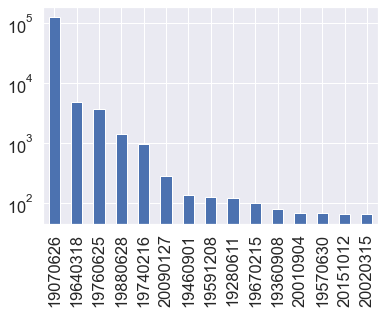

In [250]:
data['dob'].value_counts().head(15).plot(kind='bar',logy=True)

In [251]:
len(data['homephone']) * 100 / numrecords

100.0

In [252]:
len(data['homephone'].unique())

28244

In [253]:
data['homephone'].value_counts()

9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
1085332700        1
8331016607        1
8200004633        1
7517846394        1
2897617843        1
Name: homephone, Length: 28244, dtype: int64

<AxesSubplot:>

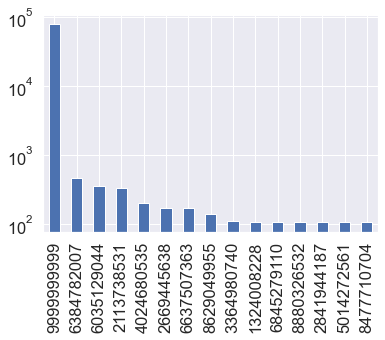

In [254]:
data['homephone'].value_counts().head(15).plot(kind='bar',logy=True)

In [255]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
17,18,2016-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,19500110,9999999999,0
26,27,2016-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,19881111,9999999999,0
60,61,2016-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,19731129,9999999999,0
64,65,2016-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,19070626,9999999999,0
145,146,2016-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,19030913,9999999999,0
149,150,2016-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,19841206,9999999999,0
178,179,2016-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,19720416,9999999999,0
179,180,2016-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,19070626,9999999999,0
180,181,2016-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,19620504,9999999999,0
200,201,2016-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,19070626,9999999999,0


In [256]:
print(f'Duration: {(timer() - start_time) / 60: 0.2f} minutes, or{(timer() - start_time): 0.0f} seconds')

Duration:  0.74 minutes, or 44 seconds


In [257]:
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
999995,999996,2016-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,2016-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,2016-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,2016-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0


In [258]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob                     int64
homephone               int64
fraud_label             int64
dtype: object

In [259]:
df = data

## Fix Frivoulous Vales

In [260]:
df['zip5'] = df['zip5'].apply(lambda x: '{0:0>5}'.format(x))
df.loc[df.ssn == 999999999, 'ssn'] = -df[df.ssn == 999999999]['record']
df['ssn'] = df['ssn'].apply(lambda x: '{0:0>9}'.format(x))


In [261]:
df.loc[df.address == '123 MAIN ST', 'address'] = \
    df.loc[df.address == '123 MAIN ST', 'record'].apply(lambda x: str(x) + 'RECORD')

In [262]:
#dob
df.loc[df.dob==19070626, 'dob'] = -df.loc[df.dob == 19070626]['record']
df['dob'] = df['dob'].apply(lambda x: '{0:0>8}'.format(x))

In [263]:
#homephone
df.loc[df.homephone == 9999999999, 'homephone'] = -df.loc[df.homephone == 9999999999]['record']
df['homephone'] = df['homephone'].apply(lambda x: '{0:0>10}'.format(x))

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  object        
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  object        
 7   dob          1000000 non-null  object        
 8   homephone    1000000 non-null  object        
 9   fraud_label  1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 76.3+ MB


## Target encoding 'Day of Week'

In [265]:
df['dow'] = df.date.apply(lambda x: calendar.day_name[x.weekday()])

In [266]:
train_test = df[df.date < '2016-11-01']
train_test.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dow
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,Friday
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,Friday
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,Friday
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,Friday
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,Friday


In [267]:
# Statistical Smoothing

c = 4
nmid = 20
y_avg = train_test['fraud_label'].mean()
y_dow = train_test.groupby('dow')['fraud_label'].mean()

num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num - nmid)/c))
df['low_risk'] = df.dow.map(y_dow_smooth)

In [268]:
y_dow = y_dow.reset_index()
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow'] = pd.Categorical(y_dow['dow'], categories=cats, ordered=True)
y_dow = y_dow.sort_values('dow')
y_dow = y_dow.set_index('dow')

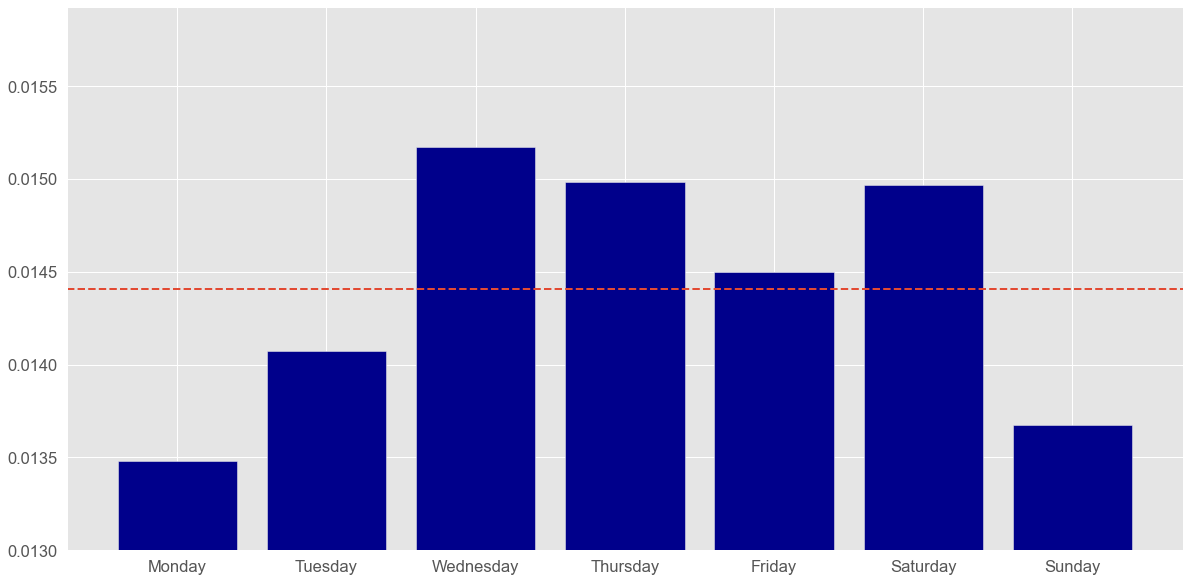

In [269]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(data=y_dow, x=y_dow.index, height='fraud_label', color='darkblue')
ax.set_ylim(bottom=0.013)
ax.axhline(y=y_avg, ls='--',lw=2)

for i,v in enumerate(y_dow.index):
    ax.text(v, y_dow.loc[i, 'fraud_label'] + 0.0001, round(y_dow.loc[i, 'fraud_label'], 5),
           horizontalalignment = 'center', fontsize = 15)
    
plt.show()

In [270]:
df['name'] = df.firstname + df.lastname
df['fulladdress'] = df.address + df.zip5
df['name_dob'] = df.name + df.dob
df['name_fulladdress'] = df.name + df.fulladdress
df['name_homephone'] = df.name + df.homephone
df['fulladdress_dob'] = df.fulladdress + df.homephone
df['fulladdress_homephone'] = df.fulladdress + df.homephone
df['dob_homephone'] = df.dob + df.homephone
df['homephone_name_dob'] = df.homephone + df.name_dob

In [272]:
for field in list(df.iloc[:,np.r_[3:9, 12:15]].columns):
    df['ssn'+field] = df.ssn + df[field]

In [273]:
df.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dow', 'low_risk', 'name',
       'fulladdress', 'name_dob', 'name_fulladdress', 'name_homephone',
       'fulladdress_dob', 'fulladdress_homephone', 'dob_homephone',
       'homephone_name_dob', 'ssnfirstname', 'ssnlastname', 'ssnaddress',
       'ssnzip5', 'ssndob', 'ssnhomephone', 'ssnname', 'ssnfulladdress',
       'ssnname_dob'],
      dtype='object')

In [274]:
attributes = list(df.iloc[:, np.r_[2,5,7,8,12:30]].columns)

In [275]:
attributes

['ssn',
 'address',
 'dob',
 'homephone',
 'name',
 'fulladdress',
 'name_dob',
 'name_fulladdress',
 'name_homephone',
 'fulladdress_dob',
 'fulladdress_homephone',
 'dob_homephone',
 'homephone_name_dob',
 'ssnfirstname',
 'ssnlastname',
 'ssnaddress',
 'ssnzip5',
 'ssndob',
 'ssnhomephone',
 'ssnname',
 'ssnfulladdress',
 'ssnname_dob']

In [276]:
df1 = df.copy()
vars = df.copy()
df1['check_date'] = df1.date
df1['check_record'] = df1.record
vars.shape

(1000000, 30)

## Velocity variables & days since variables

In [277]:
begin = time.time()
for entity in attributes:
    st = time.time()
    df_1 = df1[['record','date',entity]]
    df_r = df1[['check_record','check_date',entity]]
    temp = pd.merge(df_1, df_r, left_on = entity, right_on = entity)
    
    # day since
    day_since_df = temp[temp.record > temp.check_record][['record','date','check_date']].groupby('record')[['date','check_date']].last()
    mapper = (day_since_df.date - day_since_df.check_date).dt.days
    
    vars[entity + '_day_since'] = vars.record.map(mapper)
    vars[entity + '_day_since'].fillna(365, inplace = True)
    print(f'\n{entity}_day_since ---> Done')
    
    #velocity
    for offset_t in [0, 1, 3, 7, 14, 30]:
        count_day_df = temp[(temp.check_date >= (temp.date - dt.timedelta(offset_t)))
                           & (temp.record >= temp.check_record)]
        col_name = f'{entity}_count_{offset_t}'
        mapper2 = count_day_df.groupby('record')[entity].count()
        vars[col_name] = vars.record.map(mapper2)
        
        print(f'{entity}_count_{str(offset_t)} ---> Done')
    
    print(f'Run time for entity {entity} -------------- {time.time() - st}s')
    
    
print(f'Total run time: {(time.time() - begin) / 60}min')


ssn_day_since ---> Done
ssn_count_0 ---> Done
ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
Run time for entity ssn -------------- 2.745975971221924s

address_day_since ---> Done
address_count_0 ---> Done
address_count_1 ---> Done
address_count_3 ---> Done
address_count_7 ---> Done
address_count_14 ---> Done
address_count_30 ---> Done
Run time for entity address -------------- 2.4642348289489746s

dob_day_since ---> Done
dob_count_0 ---> Done
dob_count_1 ---> Done
dob_count_3 ---> Done
dob_count_7 ---> Done
dob_count_14 ---> Done
dob_count_30 ---> Done
Run time for entity dob -------------- 17.566466093063354s

homephone_day_since ---> Done
homephone_count_0 ---> Done
homephone_count_1 ---> Done
homephone_count_3 ---> Done
homephone_count_7 ---> Done
homephone_count_14 ---> Done
homephone_count_30 ---> Done
Run time for entity homephone -------------- 13.772588968276978s

name_day_since ---> Done
name_count_0 ---> Done


## Relative Velocity variables

In [279]:

start = time.time()

for att in attributes:
    for d in ['0', '1']:
        for dd in ['3', '7', '14', '30']:
            vars[att + '_count_' + d + '_by_' + dd] \
               = vars[att + '_count_' + d] / (vars[att + '_count_' + dd] / float(dd))
            
print(f'Total run time: {time.time() - start}s')

Total run time: 0.7426869869232178s


## Entity count variables

In [280]:
begin = time.time()

for entity in attributes:
    for field in attributes:
        st = time.time()
        if field == entity:
            continue
        else:
            df_c = df1[['record', 'date', entity]]
            df_d = df1[['check_record', 'check_date', entity, field]]
            temp = pd.merge(df_c, df_d, left_on=entity, right_on=entity)



        # number of unique for particular field
        for offset_t in [1, 3, 7, 14, 30, 60]:
            count_day_df = temp[(temp.check_date >= (temp.date - dt.timedelta(offset_t)))
                               & (temp.record >= temp.check_record)]
            col_name = f'{entity}_unique_count_for_{field}_{offset_t}'
            mapper = count_day_df.groupby(['record'])[field].nunique()
            vars[col_name] = vars.record.map(mapper)

            print(f'{entity}_count_{str(offset_t)} ---> Done')

        print(f'Run time for entity {entity} in field {field} -------------- {time.time() - st}s')

    
    print(f'Total run time: {(time.time() - begin) / 60}min')

ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
ssn_count_60 ---> Done
Run time for entity ssn in field address -------------- 4.016281843185425s
ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
ssn_count_60 ---> Done
Run time for entity ssn in field dob -------------- 3.740272045135498s
ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
ssn_count_60 ---> Done
Run time for entity ssn in field homephone -------------- 3.718125104904175s
ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
ssn_count_60 ---> Done
Run time for entity ssn in field name -------------- 3.6976680755615234s
ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
ssn_count_60 ---> Done
Run time for entity ssn in fi

address_count_3 ---> Done
address_count_7 ---> Done
address_count_14 ---> Done
address_count_30 ---> Done
address_count_60 ---> Done
Run time for entity address in field ssnzip5 -------------- 3.7978076934814453s
address_count_1 ---> Done
address_count_3 ---> Done
address_count_7 ---> Done
address_count_14 ---> Done
address_count_30 ---> Done
address_count_60 ---> Done
Run time for entity address in field ssndob -------------- 3.960024833679199s
address_count_1 ---> Done
address_count_3 ---> Done
address_count_7 ---> Done
address_count_14 ---> Done
address_count_30 ---> Done
address_count_60 ---> Done
Run time for entity address in field ssnhomephone -------------- 4.008649110794067s
address_count_1 ---> Done
address_count_3 ---> Done
address_count_7 ---> Done
address_count_14 ---> Done
address_count_30 ---> Done
address_count_60 ---> Done
Run time for entity address in field ssnname -------------- 4.147004842758179s
address_count_1 ---> Done
address_count_3 ---> Done
address_count_7 -

homephone_count_1 ---> Done
homephone_count_3 ---> Done
homephone_count_7 ---> Done
homephone_count_14 ---> Done
homephone_count_30 ---> Done
homephone_count_60 ---> Done
Run time for entity homephone in field fulladdress_homephone -------------- 17.713016271591187s
homephone_count_1 ---> Done
homephone_count_3 ---> Done
homephone_count_7 ---> Done
homephone_count_14 ---> Done
homephone_count_30 ---> Done
homephone_count_60 ---> Done
Run time for entity homephone in field dob_homephone -------------- 17.43367290496826s
homephone_count_1 ---> Done
homephone_count_3 ---> Done
homephone_count_7 ---> Done
homephone_count_14 ---> Done
homephone_count_30 ---> Done
homephone_count_60 ---> Done
Run time for entity homephone in field homephone_name_dob -------------- 32.50736594200134s
homephone_count_1 ---> Done
homephone_count_3 ---> Done
homephone_count_7 ---> Done
homephone_count_14 ---> Done
homephone_count_30 ---> Done
homephone_count_60 ---> Done
Run time for entity homephone in field ss

fulladdress_count_60 ---> Done
Run time for entity fulladdress in field address -------------- 21.858404874801636s
fulladdress_count_1 ---> Done
fulladdress_count_3 ---> Done
fulladdress_count_7 ---> Done
fulladdress_count_14 ---> Done
fulladdress_count_30 ---> Done
fulladdress_count_60 ---> Done
Run time for entity fulladdress in field dob -------------- 4.193521976470947s
fulladdress_count_1 ---> Done
fulladdress_count_3 ---> Done
fulladdress_count_7 ---> Done
fulladdress_count_14 ---> Done
fulladdress_count_30 ---> Done
fulladdress_count_60 ---> Done
Run time for entity fulladdress in field homephone -------------- 4.0119688510894775s
fulladdress_count_1 ---> Done
fulladdress_count_3 ---> Done
fulladdress_count_7 ---> Done
fulladdress_count_14 ---> Done
fulladdress_count_30 ---> Done
fulladdress_count_60 ---> Done
Run time for entity fulladdress in field name -------------- 3.987971067428589s
fulladdress_count_1 ---> Done
fulladdress_count_3 ---> Done
fulladdress_count_7 ---> Done
f

name_dob_count_1 ---> Done
name_dob_count_3 ---> Done
name_dob_count_7 ---> Done
name_dob_count_14 ---> Done
name_dob_count_30 ---> Done
name_dob_count_60 ---> Done
Run time for entity name_dob in field ssnfirstname -------------- 25.605759859085083s
name_dob_count_1 ---> Done
name_dob_count_3 ---> Done
name_dob_count_7 ---> Done
name_dob_count_14 ---> Done
name_dob_count_30 ---> Done
name_dob_count_60 ---> Done
Run time for entity name_dob in field ssnlastname -------------- 4.725172996520996s
name_dob_count_1 ---> Done
name_dob_count_3 ---> Done
name_dob_count_7 ---> Done
name_dob_count_14 ---> Done
name_dob_count_30 ---> Done
name_dob_count_60 ---> Done
Run time for entity name_dob in field ssnaddress -------------- 4.2911460399627686s
name_dob_count_1 ---> Done
name_dob_count_3 ---> Done
name_dob_count_7 ---> Done
name_dob_count_14 ---> Done
name_dob_count_30 ---> Done
name_dob_count_60 ---> Done
Run time for entity name_dob in field ssnzip5 -------------- 3.97884202003479s
name_do

name_fulladdress_count_30 ---> Done
name_fulladdress_count_60 ---> Done
Run time for entity name_fulladdress in field ssnfulladdress -------------- 4.339978933334351s
name_fulladdress_count_1 ---> Done
name_fulladdress_count_3 ---> Done
name_fulladdress_count_7 ---> Done
name_fulladdress_count_14 ---> Done
name_fulladdress_count_30 ---> Done
name_fulladdress_count_60 ---> Done
Run time for entity name_fulladdress in field ssnname_dob -------------- 4.496497869491577s
Total run time: 26.525540661811828min
name_homephone_count_1 ---> Done
name_homephone_count_3 ---> Done
name_homephone_count_7 ---> Done
name_homephone_count_14 ---> Done
name_homephone_count_30 ---> Done
name_homephone_count_60 ---> Done
Run time for entity name_homephone in field ssn -------------- 3.9237449169158936s
name_homephone_count_1 ---> Done
name_homephone_count_3 ---> Done
name_homephone_count_7 ---> Done
name_homephone_count_14 ---> Done
name_homephone_count_30 ---> Done
name_homephone_count_60 ---> Done
Run t

fulladdress_dob_count_14 ---> Done
fulladdress_dob_count_30 ---> Done
fulladdress_dob_count_60 ---> Done
Run time for entity fulladdress_dob in field fulladdress -------------- 4.2254719734191895s
fulladdress_dob_count_1 ---> Done
fulladdress_dob_count_3 ---> Done
fulladdress_dob_count_7 ---> Done
fulladdress_dob_count_14 ---> Done
fulladdress_dob_count_30 ---> Done
fulladdress_dob_count_60 ---> Done
Run time for entity fulladdress_dob in field name_dob -------------- 4.289082050323486s
fulladdress_dob_count_1 ---> Done
fulladdress_dob_count_3 ---> Done
fulladdress_dob_count_7 ---> Done
fulladdress_dob_count_14 ---> Done
fulladdress_dob_count_30 ---> Done
fulladdress_dob_count_60 ---> Done
Run time for entity fulladdress_dob in field name_fulladdress -------------- 4.503825902938843s
fulladdress_dob_count_1 ---> Done
fulladdress_dob_count_3 ---> Done
fulladdress_dob_count_7 ---> Done
fulladdress_dob_count_14 ---> Done
fulladdress_dob_count_30 ---> Done
fulladdress_dob_count_60 ---> Don

fulladdress_homephone_count_14 ---> Done
fulladdress_homephone_count_30 ---> Done
fulladdress_homephone_count_60 ---> Done
Run time for entity fulladdress_homephone in field dob_homephone -------------- 4.4820716381073s
fulladdress_homephone_count_1 ---> Done
fulladdress_homephone_count_3 ---> Done
fulladdress_homephone_count_7 ---> Done
fulladdress_homephone_count_14 ---> Done
fulladdress_homephone_count_30 ---> Done
fulladdress_homephone_count_60 ---> Done
Run time for entity fulladdress_homephone in field homephone_name_dob -------------- 4.626456022262573s
fulladdress_homephone_count_1 ---> Done
fulladdress_homephone_count_3 ---> Done
fulladdress_homephone_count_7 ---> Done
fulladdress_homephone_count_14 ---> Done
fulladdress_homephone_count_30 ---> Done
fulladdress_homephone_count_60 ---> Done
Run time for entity fulladdress_homephone in field ssnfirstname -------------- 4.364651918411255s
fulladdress_homephone_count_1 ---> Done
fulladdress_homephone_count_3 ---> Done
fulladdress_

dob_homephone_count_1 ---> Done
dob_homephone_count_3 ---> Done
dob_homephone_count_7 ---> Done
dob_homephone_count_14 ---> Done
dob_homephone_count_30 ---> Done
dob_homephone_count_60 ---> Done
Run time for entity dob_homephone in field ssndob -------------- 4.100446939468384s
dob_homephone_count_1 ---> Done
dob_homephone_count_3 ---> Done
dob_homephone_count_7 ---> Done
dob_homephone_count_14 ---> Done
dob_homephone_count_30 ---> Done
dob_homephone_count_60 ---> Done
Run time for entity dob_homephone in field ssnhomephone -------------- 4.130122900009155s
dob_homephone_count_1 ---> Done
dob_homephone_count_3 ---> Done
dob_homephone_count_7 ---> Done
dob_homephone_count_14 ---> Done
dob_homephone_count_30 ---> Done
dob_homephone_count_60 ---> Done
Run time for entity dob_homephone in field ssnname -------------- 4.220034122467041s
dob_homephone_count_1 ---> Done
dob_homephone_count_3 ---> Done
dob_homephone_count_7 ---> Done
dob_homephone_count_14 ---> Done
dob_homephone_count_30 --->

ssnfirstname_count_3 ---> Done
ssnfirstname_count_7 ---> Done
ssnfirstname_count_14 ---> Done
ssnfirstname_count_30 ---> Done
ssnfirstname_count_60 ---> Done
Run time for entity ssnfirstname in field ssn -------------- 3.9108123779296875s
ssnfirstname_count_1 ---> Done
ssnfirstname_count_3 ---> Done
ssnfirstname_count_7 ---> Done
ssnfirstname_count_14 ---> Done
ssnfirstname_count_30 ---> Done
ssnfirstname_count_60 ---> Done
Run time for entity ssnfirstname in field address -------------- 3.869582176208496s
ssnfirstname_count_1 ---> Done
ssnfirstname_count_3 ---> Done
ssnfirstname_count_7 ---> Done
ssnfirstname_count_14 ---> Done
ssnfirstname_count_30 ---> Done
ssnfirstname_count_60 ---> Done
Run time for entity ssnfirstname in field dob -------------- 3.7882080078125s
ssnfirstname_count_1 ---> Done
ssnfirstname_count_3 ---> Done
ssnfirstname_count_7 ---> Done
ssnfirstname_count_14 ---> Done
ssnfirstname_count_30 ---> Done
ssnfirstname_count_60 ---> Done
Run time for entity ssnfirstname

ssnlastname_count_1 ---> Done
ssnlastname_count_3 ---> Done
ssnlastname_count_7 ---> Done
ssnlastname_count_14 ---> Done
ssnlastname_count_30 ---> Done
ssnlastname_count_60 ---> Done
Run time for entity ssnlastname in field fulladdress_dob -------------- 4.250831127166748s
ssnlastname_count_1 ---> Done
ssnlastname_count_3 ---> Done
ssnlastname_count_7 ---> Done
ssnlastname_count_14 ---> Done
ssnlastname_count_30 ---> Done
ssnlastname_count_60 ---> Done
Run time for entity ssnlastname in field fulladdress_homephone -------------- 4.4712629318237305s
ssnlastname_count_1 ---> Done
ssnlastname_count_3 ---> Done
ssnlastname_count_7 ---> Done
ssnlastname_count_14 ---> Done
ssnlastname_count_30 ---> Done
ssnlastname_count_60 ---> Done
Run time for entity ssnlastname in field dob_homephone -------------- 4.078433036804199s
ssnlastname_count_1 ---> Done
ssnlastname_count_3 ---> Done
ssnlastname_count_7 ---> Done
ssnlastname_count_14 ---> Done
ssnlastname_count_30 ---> Done
ssnlastname_count_60 

ssnaddress_count_1 ---> Done
ssnaddress_count_3 ---> Done
ssnaddress_count_7 ---> Done
ssnaddress_count_14 ---> Done
ssnaddress_count_30 ---> Done
ssnaddress_count_60 ---> Done
Run time for entity ssnaddress in field ssnfulladdress -------------- 4.479862928390503s
ssnaddress_count_1 ---> Done
ssnaddress_count_3 ---> Done
ssnaddress_count_7 ---> Done
ssnaddress_count_14 ---> Done
ssnaddress_count_30 ---> Done
ssnaddress_count_60 ---> Done
Run time for entity ssnaddress in field ssnname_dob -------------- 4.52594518661499s
Total run time: 45.548987146218614min
ssnzip5_count_1 ---> Done
ssnzip5_count_3 ---> Done
ssnzip5_count_7 ---> Done
ssnzip5_count_14 ---> Done
ssnzip5_count_30 ---> Done
ssnzip5_count_60 ---> Done
Run time for entity ssnzip5 in field ssn -------------- 3.929029703140259s
ssnzip5_count_1 ---> Done
ssnzip5_count_3 ---> Done
ssnzip5_count_7 ---> Done
ssnzip5_count_14 ---> Done
ssnzip5_count_30 ---> Done
ssnzip5_count_60 ---> Done
Run time for entity ssnzip5 in field addr

ssndob_count_1 ---> Done
ssndob_count_3 ---> Done
ssndob_count_7 ---> Done
ssndob_count_14 ---> Done
ssndob_count_30 ---> Done
ssndob_count_60 ---> Done
Run time for entity ssndob in field dob_homephone -------------- 4.155424118041992s
ssndob_count_1 ---> Done
ssndob_count_3 ---> Done
ssndob_count_7 ---> Done
ssndob_count_14 ---> Done
ssndob_count_30 ---> Done
ssndob_count_60 ---> Done
Run time for entity ssndob in field homephone_name_dob -------------- 4.621078014373779s
ssndob_count_1 ---> Done
ssndob_count_3 ---> Done
ssndob_count_7 ---> Done
ssndob_count_14 ---> Done
ssndob_count_30 ---> Done
ssndob_count_60 ---> Done
Run time for entity ssndob in field ssnfirstname -------------- 4.358752012252808s
ssndob_count_1 ---> Done
ssndob_count_3 ---> Done
ssndob_count_7 ---> Done
ssndob_count_14 ---> Done
ssndob_count_30 ---> Done
ssndob_count_60 ---> Done
Run time for entity ssndob in field ssnlastname -------------- 4.101701259613037s
ssndob_count_1 ---> Done
ssndob_count_3 ---> Done


ssnname_count_1 ---> Done
ssnname_count_3 ---> Done
ssnname_count_7 ---> Done
ssnname_count_14 ---> Done
ssnname_count_30 ---> Done
ssnname_count_60 ---> Done
Run time for entity ssnname in field ssn -------------- 4.126101016998291s
ssnname_count_1 ---> Done
ssnname_count_3 ---> Done
ssnname_count_7 ---> Done
ssnname_count_14 ---> Done
ssnname_count_30 ---> Done
ssnname_count_60 ---> Done
Run time for entity ssnname in field address -------------- 4.019988775253296s
ssnname_count_1 ---> Done
ssnname_count_3 ---> Done
ssnname_count_7 ---> Done
ssnname_count_14 ---> Done
ssnname_count_30 ---> Done
ssnname_count_60 ---> Done
Run time for entity ssnname in field dob -------------- 3.811339855194092s
ssnname_count_1 ---> Done
ssnname_count_3 ---> Done
ssnname_count_7 ---> Done
ssnname_count_14 ---> Done
ssnname_count_30 ---> Done
ssnname_count_60 ---> Done
Run time for entity ssnname in field homephone -------------- 3.829396963119507s
ssnname_count_1 ---> Done
ssnname_count_3 ---> Done
ss

ssnfulladdress_count_1 ---> Done
ssnfulladdress_count_3 ---> Done
ssnfulladdress_count_7 ---> Done
ssnfulladdress_count_14 ---> Done
ssnfulladdress_count_30 ---> Done
ssnfulladdress_count_60 ---> Done
Run time for entity ssnfulladdress in field dob_homephone -------------- 4.424079179763794s
ssnfulladdress_count_1 ---> Done
ssnfulladdress_count_3 ---> Done
ssnfulladdress_count_7 ---> Done
ssnfulladdress_count_14 ---> Done
ssnfulladdress_count_30 ---> Done
ssnfulladdress_count_60 ---> Done
Run time for entity ssnfulladdress in field homephone_name_dob -------------- 4.597245931625366s
ssnfulladdress_count_1 ---> Done
ssnfulladdress_count_3 ---> Done
ssnfulladdress_count_7 ---> Done
ssnfulladdress_count_14 ---> Done
ssnfulladdress_count_30 ---> Done
ssnfulladdress_count_60 ---> Done
Run time for entity ssnfulladdress in field ssnfirstname -------------- 4.241535902023315s
ssnfulladdress_count_1 ---> Done
ssnfulladdress_count_3 ---> Done
ssnfulladdress_count_7 ---> Done
ssnfulladdress_cou

ssnname_dob_count_60 ---> Done
Run time for entity ssnname_dob in field ssnname -------------- 4.306109189987183s
ssnname_dob_count_1 ---> Done
ssnname_dob_count_3 ---> Done
ssnname_dob_count_7 ---> Done
ssnname_dob_count_14 ---> Done
ssnname_dob_count_30 ---> Done
ssnname_dob_count_60 ---> Done
Run time for entity ssnname_dob in field ssnfulladdress -------------- 4.348964214324951s
Total run time: 63.61839538415273min


In [292]:
vars.shape

(1000000, 3132)

# More new/interesting variables

In [293]:
df_copy = df.copy()

In [294]:
df_copy.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dow', 'low_risk', 'name',
       'fulladdress', 'name_dob', 'name_fulladdress', 'name_homephone',
       'fulladdress_dob', 'fulladdress_homephone', 'dob_homephone',
       'homephone_name_dob', 'ssnfirstname', 'ssnlastname', 'ssnaddress',
       'ssnzip5', 'ssndob', 'ssnhomephone', 'ssnname', 'ssnfulladdress',
       'ssnname_dob'],
      dtype='object')

In [295]:
df_copy['name_zip5'] = df_copy.name + df_copy.zip5
df_copy['name_address'] = df_copy.name + df_copy.address
df_copy['SNPD'] = df_copy.ssn + df_copy.name + df_copy.homephone + df_copy.dob
df_copy['ssndob_homephone'] = df_copy.ssn + df_copy.dob + df_copy.homephone
df_copy['ssnfulladdress_homephone'] = df_copy.ssn + df_copy.fulladdress + df_copy.homephone
df_copy['ssnfulladdress_dob'] = df_copy.ssn + df_copy.fulladdress + df_copy.dob
df_copy['ssnname_homephone'] = df_copy.ssn + df_copy.name + df_copy.homephone
df_copy['ssnname_fulladdress'] = df_copy.ssn + df_copy.name + df.fulladdress

In [296]:
for field in list(df_copy.iloc[:,np.r_[3:7]].columns):
    df_copy['dob_'+field] = df_copy.dob + df_copy[field]

In [297]:
for field in list(df_copy.iloc[:,np.r_[3:7, 15, 17]].columns):
    df_copy['homephone_'+field] = df_copy.homephone + df_copy[field]

In [298]:
df_copy['zip3'] = df_copy['zip5'].str[:3]
df_copy['shortaddress'] = df_copy['address'].str.split(' ', 1, expand=True)[1]
df_copy['shortdob'] = df_copy['dob'].str[-4:]
df_copy['shortadd_zip5'] = df_copy.shortaddress + df_copy.zip5
df_copy['shortadd_zip3'] = df_copy.shortaddress + df_copy.zip3
df_copy['shortdob_add'] = df_copy.shortdob + df_copy.shortaddress
df_copy['shortdob_add_zip5'] = df_copy.shortdob + df_copy.shortaddress + df_copy.zip5
df_copy['shortdob_add_zip3'] = df_copy.shortdob + df_copy.shortaddress + df_copy.zip3

In [299]:
for field in list(df_copy.iloc[:,np.r_[2,5,7,8]].columns):
    df_copy[field + '_zip3'] = df_copy[field] + df_copy.zip3

In [300]:
df_copy.shape

(1000000, 60)

In [301]:
df_copy.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dow', 'low_risk', 'name',
       'fulladdress', 'name_dob', 'name_fulladdress', 'name_homephone',
       'fulladdress_dob', 'fulladdress_homephone', 'dob_homephone',
       'homephone_name_dob', 'ssnfirstname', 'ssnlastname', 'ssnaddress',
       'ssnzip5', 'ssndob', 'ssnhomephone', 'ssnname', 'ssnfulladdress',
       'ssnname_dob', 'name_zip5', 'name_address', 'SNPD', 'ssndob_homephone',
       'ssnfulladdress_homephone', 'ssnfulladdress_dob', 'ssnname_homephone',
       'ssnname_fulladdress', 'dob_firstname', 'dob_lastname', 'dob_address',
       'dob_zip5', 'homephone_firstname', 'homephone_lastname',
       'homephone_address', 'homephone_zip5', 'homephone_name_fulladdress',
       'homephone_fulladdress_dob', 'zip3', 'shortaddress', 'shortdob',
       'shortadd_zip5', 'shortadd_zip3', 'shortdob_add', 'shortdob_add_zip5',
       'shortdob_add_zip3', 'ssn_zip3', 'ad

In [302]:
attributes_copy = list(df_copy.iloc[:, np.r_[30:48]].columns)

# List to control loop input
l1 = list(range(0,14))
l2 = list(range(30,60))
l3 = l1 + l2

In [303]:
df1_copy = df_copy.iloc[:,l3]
vars_copy = df_copy.iloc[:,l3]
df1_copy['check_date'] = df1_copy.date
df1_copy['check_record'] = df1_copy.record
vars_copy.shape

<ipython-input-303-98533cbfd2bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_copy['check_date'] = df1_copy.date
<ipython-input-303-98533cbfd2bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_copy['check_record'] = df1_copy.record


(1000000, 44)

## New Variables: Part 1

In [304]:
begin = time.time()
for entity in attributes_copy:
    st = time.time()
    df_1 = df1_copy[['record','date',entity]]
    df_r = df1_copy[['check_record','check_date',entity]]
    temp = pd.merge(df_1, df_r, left_on = entity, right_on = entity)
    
    # day since
    day_since_df = temp[temp.record > temp.check_record][['record','date','check_date']].groupby('record')[['date','check_date']].last()
    mapper = (day_since_df.date - day_since_df.check_date).dt.days
    
    vars_copy[entity + '_day_since'] = vars_copy.record.map(mapper)
    vars_copy[entity + '_day_since'].fillna(365, inplace = True)
    print(f'\n{entity}_day_since ---> Done')
    
    #velocity
    for offset_t in [0, 1, 3, 7, 14, 30, 60]:
        count_day_df = temp[(temp.check_date >= (temp.date - dt.timedelta(offset_t)))
                           & (temp.record >= temp.check_record)]
        col_name = f'{entity}_count_{offset_t}'
        mapper2 = count_day_df.groupby('record')[entity].count()
        vars_copy[col_name] = vars_copy.record.map(mapper2)
        
        print(f'{entity}_count_{str(offset_t)} ---> Done')
    
    print(f'Run time for entity {entity} -------------- {time.time() - st}s')
    
    
print(f'Total run time: {(time.time() - begin) / 60}min')

<ipython-input-304-37bd4fc0524f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[entity + '_day_since'] = vars_copy.record.map(mapper)
/Users/chinmayibengaluruprakash/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(



name_zip5_day_since ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_zip5_count_0 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_zip5_count_1 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_zip5_count_3 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_zip5_count_7 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_zip5_count_14 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_zip5_count_30 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_zip5_count_60 ---> Done
Run time for entity name_zip5 -------------- 3.111633062362671s


<ipython-input-304-37bd4fc0524f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[entity + '_day_since'] = vars_copy.record.map(mapper)
/Users/chinmayibengaluruprakash/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(



name_address_day_since ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_address_count_0 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_address_count_1 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_address_count_3 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_address_count_7 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_address_count_14 ---> Done


<ipython-input-304-37bd4fc0524f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_copy[col_name] = vars_copy.record.map(mapper2)


name_address_count_30 ---> Done
name_address_count_60 ---> Done
Run time for entity name_address -------------- 2.787498950958252s

SNPD_day_since ---> Done
SNPD_count_0 ---> Done
SNPD_count_1 ---> Done
SNPD_count_3 ---> Done
SNPD_count_7 ---> Done
SNPD_count_14 ---> Done
SNPD_count_30 ---> Done
SNPD_count_60 ---> Done
Run time for entity SNPD -------------- 2.584351062774658s

ssndob_homephone_day_since ---> Done
ssndob_homephone_count_0 ---> Done
ssndob_homephone_count_1 ---> Done
ssndob_homephone_count_3 ---> Done
ssndob_homephone_count_7 ---> Done
ssndob_homephone_count_14 ---> Done
ssndob_homephone_count_30 ---> Done
ssndob_homephone_count_60 ---> Done
Run time for entity ssndob_homephone -------------- 2.5340232849121094s

ssnfulladdress_homephone_day_since ---> Done
ssnfulladdress_homephone_count_0 ---> Done
ssnfulladdress_homephone_count_1 ---> Done
ssnfulladdress_homephone_count_3 ---> Done
ssnfulladdress_homephone_count_7 ---> Done
ssnfulladdress_homephone_count_14 ---> Done


## New Variables: Part 2

In [305]:
df1_copy = df_copy.iloc[:,l3]
vars2_copy = df_copy.iloc[:,l3]
df1_copy['check_date'] = df1_copy.date
df1_copy['check_record'] = df1_copy.record
vars2_copy.shape

attributes_copy_iter2 = list(df_copy.iloc[:, np.r_[49,51:60]].columns)

<ipython-input-305-9a58f4e3247d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_copy['check_date'] = df1_copy.date
<ipython-input-305-9a58f4e3247d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_copy['check_record'] = df1_copy.record


In [306]:
begin = time.time()
for entity in attributes_copy_iter2:
    st = time.time()
    df_1 = df1_copy[['record','date',entity]]
    df_r = df1_copy[['check_record','check_date',entity]]
    temp = pd.merge(df_1, df_r, left_on = entity, right_on = entity)
    
    # day since
    day_since_df = temp[temp.record > temp.check_record][['record','date','check_date']].groupby('record')[['date','check_date']].last()
    mapper = (day_since_df.date - day_since_df.check_date).dt.days
    
    vars2_copy[entity + '_day_since'] = vars2_copy.record.map(mapper)
    vars2_copy[entity + '_day_since'].fillna(365, inplace = True)
    print(f'\n{entity}_day_since ---> Done')
    
    #velocity
    for offset_t in [0, 1, 3, 7, 14, 30]:
        count_day_df = temp[(temp.check_date >= (temp.date - dt.timedelta(offset_t)))
                           & (temp.record >= temp.check_record)]
        col_name = f'{entity}_count_{offset_t}'
        mapper2 = count_day_df.groupby('record')[entity].count()
        vars2_copy[col_name] = vars2_copy.record.map(mapper2)
        
        print(f'{entity}_count_{str(offset_t)} ---> Done')
    
    print(f'Run time for entity {entity} -------------- {time.time() - st}s')
    
    
print(f'Total run time: {(time.time() - begin) / 60}min')

<ipython-input-306-e2aa4dadba29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[entity + '_day_since'] = vars2_copy.record.map(mapper)
/Users/chinmayibengaluruprakash/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(



shortaddress_day_since ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortaddress_count_0 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortaddress_count_1 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortaddress_count_3 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortaddress_count_7 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortaddress_count_14 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortaddress_count_30 ---> Done
Run time for entity shortaddress -------------- 3.5485219955444336s


<ipython-input-306-e2aa4dadba29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[entity + '_day_since'] = vars2_copy.record.map(mapper)
/Users/chinmayibengaluruprakash/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(



shortadd_zip5_day_since ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortadd_zip5_count_0 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortadd_zip5_count_1 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortadd_zip5_count_3 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortadd_zip5_count_7 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortadd_zip5_count_14 ---> Done


<ipython-input-306-e2aa4dadba29>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[col_name] = vars2_copy.record.map(mapper2)


shortadd_zip5_count_30 ---> Done
Run time for entity shortadd_zip5 -------------- 2.5810561180114746s


<ipython-input-306-e2aa4dadba29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars2_copy[entity + '_day_since'] = vars2_copy.record.map(mapper)
/Users/chinmayibengaluruprakash/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(



shortadd_zip3_day_since ---> Done
shortadd_zip3_count_0 ---> Done
shortadd_zip3_count_1 ---> Done
shortadd_zip3_count_3 ---> Done
shortadd_zip3_count_7 ---> Done
shortadd_zip3_count_14 ---> Done
shortadd_zip3_count_30 ---> Done
Run time for entity shortadd_zip3 -------------- 2.51401686668396s

shortdob_add_day_since ---> Done
shortdob_add_count_0 ---> Done
shortdob_add_count_1 ---> Done
shortdob_add_count_3 ---> Done
shortdob_add_count_7 ---> Done
shortdob_add_count_14 ---> Done
shortdob_add_count_30 ---> Done
Run time for entity shortdob_add -------------- 2.374845027923584s

shortdob_add_zip5_day_since ---> Done
shortdob_add_zip5_count_0 ---> Done
shortdob_add_zip5_count_1 ---> Done
shortdob_add_zip5_count_3 ---> Done
shortdob_add_zip5_count_7 ---> Done
shortdob_add_zip5_count_14 ---> Done
shortdob_add_zip5_count_30 ---> Done
Run time for entity shortdob_add_zip5 -------------- 2.3628828525543213s

shortdob_add_zip3_day_since ---> Done
shortdob_add_zip3_count_0 ---> Done
shortdob_a

## Merging DataFrames

In [307]:
print(vars_copy.shape)
print(vars2_copy.shape)
print(vars.shape)
print(vars_custom.shape)

(1000000, 188)
(1000000, 114)
(1000000, 3132)
(1000000, 258)


In [308]:
#Merge the DataFrames
vars_custom = pd.merge(vars_copy,vars2_copy, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))

#Drop the duplicate columns
vars_custom.drop([col for col in vars_custom.columns if 'drop' in col], axis=1, inplace=True)

In [ ]:
#Merge the DataFrames
vars_final = pd.merge(vars,vars_custom, how='inner', left_index=True, right_index=True, suffixes=('', '_drop'))

#Drop the duplicate columns
vars_final.drop([col for col in vars_final.columns if 'drop' in col], axis=1, inplace=True)

# Creating csv file

In [ ]:
vars_export = list(vars_final.columns)
df_exp = pd.DataFrame(vars_export, columns=["ColummnName"])
df_exp.to_csv('vars.csv', index=False)